# sample 

In [2]:
# 피클 데이터 샘플 5월 
# 1. 지역 선정 > 상위 업종 barplot 
# 2. 업종별 시간대 건수 확인 (매출 건수 확인을 위한)
# 3. folium 상위 업종의 분포 지역 확인 ; 어떤 업종이 어디 상권을 형성하는지 지역 내 확인 가능 
# 4. 지역의 업종별 소비자 분석 

In [1]:
# 데이터 불러오기 

import pickle
with open('jeju_uniq_data5.pickle','rb') as fr:
    df_5 = pickle.load(fr)

df_5.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
273178,268815,268815,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,50000,0,1,0,889087.2224,1.472077e+06,126.30957647197593,33.23428902334641,126.30957647197593_33.23428902334641,안덕면
273179,269416,269416,202005,제주특별자치도,제주시,일반,건강식품(회원제형태),x시,7662600,0,12,0,903092.2237,1.501082e+06,126.45675120309421,33.49720789225105,126.45675120309421_33.49720789225105,이호일동
273180,269436,269436,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,240000,0,1,0,903666.4287,1.475096e+06,126.46571021256327,33.2629083000071,126.46571021256327_33.2629083000071,하원동
273181,270508,270508,202005,제주특별자치도,제주시,일반,기타음료식품,x시,90750,0,1,0,907738.4497,1.501454e+06,126.50672452857444,33.50097517749024,126.50672452857444_33.50097517749024,용담이동
273182,271853,271853,202005,제주특별자치도,서귀포시,일반,기타음료식품,x시,200000,0,1,0,912018.4146,1.473936e+06,126.55548315030599,33.25316331771586,126.55548315030599_33.25316331771586,서홍동


In [4]:
# 지역 선정하기 #조천읍 

cond1 = df_5['SIGUNGU'] == '제주시'
cond2 = df_5['dong'].str.contains('조천읍')
df_reg_jce = df_5[cond1&cond2]
df_reg_jce.head(5)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
118410,4480,4480,202005,제주특별자치도,제주시,일반,스넥,00시,190000,79000,5,2,918117.2881,1504952.17,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118411,8296,8296,202005,제주특별자치도,제주시,일반,스넥,01시,231000,60000,6,2,918117.2881,1504952.17,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118412,29245,29245,202005,제주특별자치도,제주시,영세,제과점,08시,15000,15000,1,1,918117.2881,1504952.17,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118413,70047,70047,202005,제주특별자치도,제주시,영세,스넥,11시,13000,0,3,0,918117.2881,1504952.17,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118414,70048,70048,202005,제주특별자치도,제주시,영세,일반한식,11시,19000,0,1,0,918117.2881,1504952.17,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍


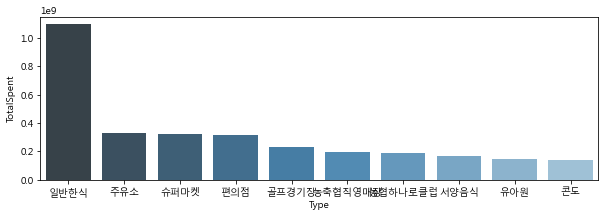

In [8]:
# 상위 10개에 대해 확인 
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')
import seaborn as sns


df_reg_jce_ty = df_reg_jce.groupby(['Type']).sum()
df_reg_jce_ty = df_reg_jce_ty.sort_values('TotalSpent', ascending=False)
df_reg_jce_ty = df_reg_jce_ty.reset_index()


plt.figure(figsize=(10,3))
sns.barplot(x='Type', y ='TotalSpent', data=df_reg_jce_ty[:10],palette = 'Blues_d')

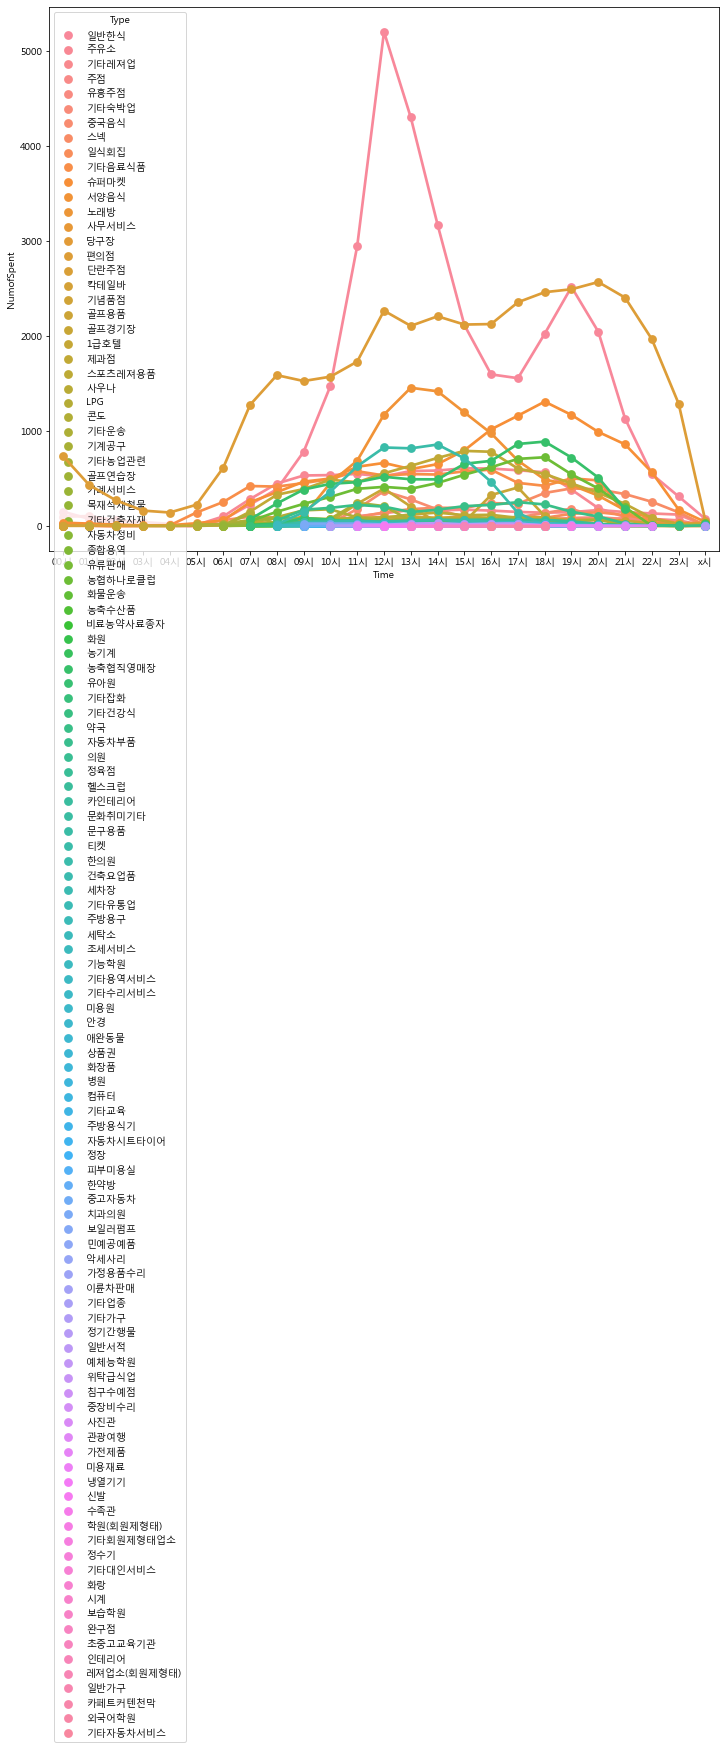

In [47]:
# 상위 10개에 대해 확인 

df_reg_jce_time = df_reg_jce.groupby(['Type','Time']).sum()
df_reg_jce_time = df_reg_jce_time.sort_values('Time')
df_reg_jce_time = df_reg_jce_time.reset_index()

plt.figure(figsize=(12,10))
sns.pointplot(x='Time', y ='NumofSpent', data=df_reg_jce_time, hue='Type')

################### 상위 업종 10개 - 업종 TYPE 구분 필요함 ##########################

In [48]:
df_reg_jce

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
118410,4480,4480,202005,제주특별자치도,제주시,일반,스넥,00시,190000,79000,5,2,918117.2881,1.504952e+06,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118411,8296,8296,202005,제주특별자치도,제주시,일반,스넥,01시,231000,60000,6,2,918117.2881,1.504952e+06,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118412,29245,29245,202005,제주특별자치도,제주시,영세,제과점,08시,15000,15000,1,1,918117.2881,1.504952e+06,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118413,70047,70047,202005,제주특별자치도,제주시,영세,스넥,11시,13000,0,3,0,918117.2881,1.504952e+06,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
118414,70048,70048,202005,제주특별자치도,제주시,영세,일반한식,11시,19000,0,1,0,918117.2881,1.504952e+06,126.61812934433541,33.53337120931374,126.61812934433541_33.53337120931374,조천읍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273104,239650,239650,202005,제주특별자치도,제주시,영세,일반한식,20시,24000,0,3,0,922412.3019,1.505623e+06,126.66432373342602,33.539737845229446,126.66432373342602_33.539737845229446,조천읍
273105,251920,251920,202005,제주특별자치도,제주시,영세,일반한식,21시,182000,0,11,0,922412.3019,1.505623e+06,126.66432373342602,33.539737845229446,126.66432373342602_33.539737845229446,조천읍
273106,239883,239883,202005,제주특별자치도,제주시,영세,기타숙박업,20시,34000,0,1,0,924807.1864,1.506484e+06,126.69004365483858,33.5476758294344,126.69004365483858_33.5476758294344,조천읍
273144,252128,252128,202005,제주특별자치도,제주시,영세,일반한식,21시,201000,0,1,0,926550.8670,1.497246e+06,126.70958230491276,33.46448278024832,126.70958230491276_33.46448278024832,조천읍
